In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv("donnees/CC GENERAL.csv")

In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


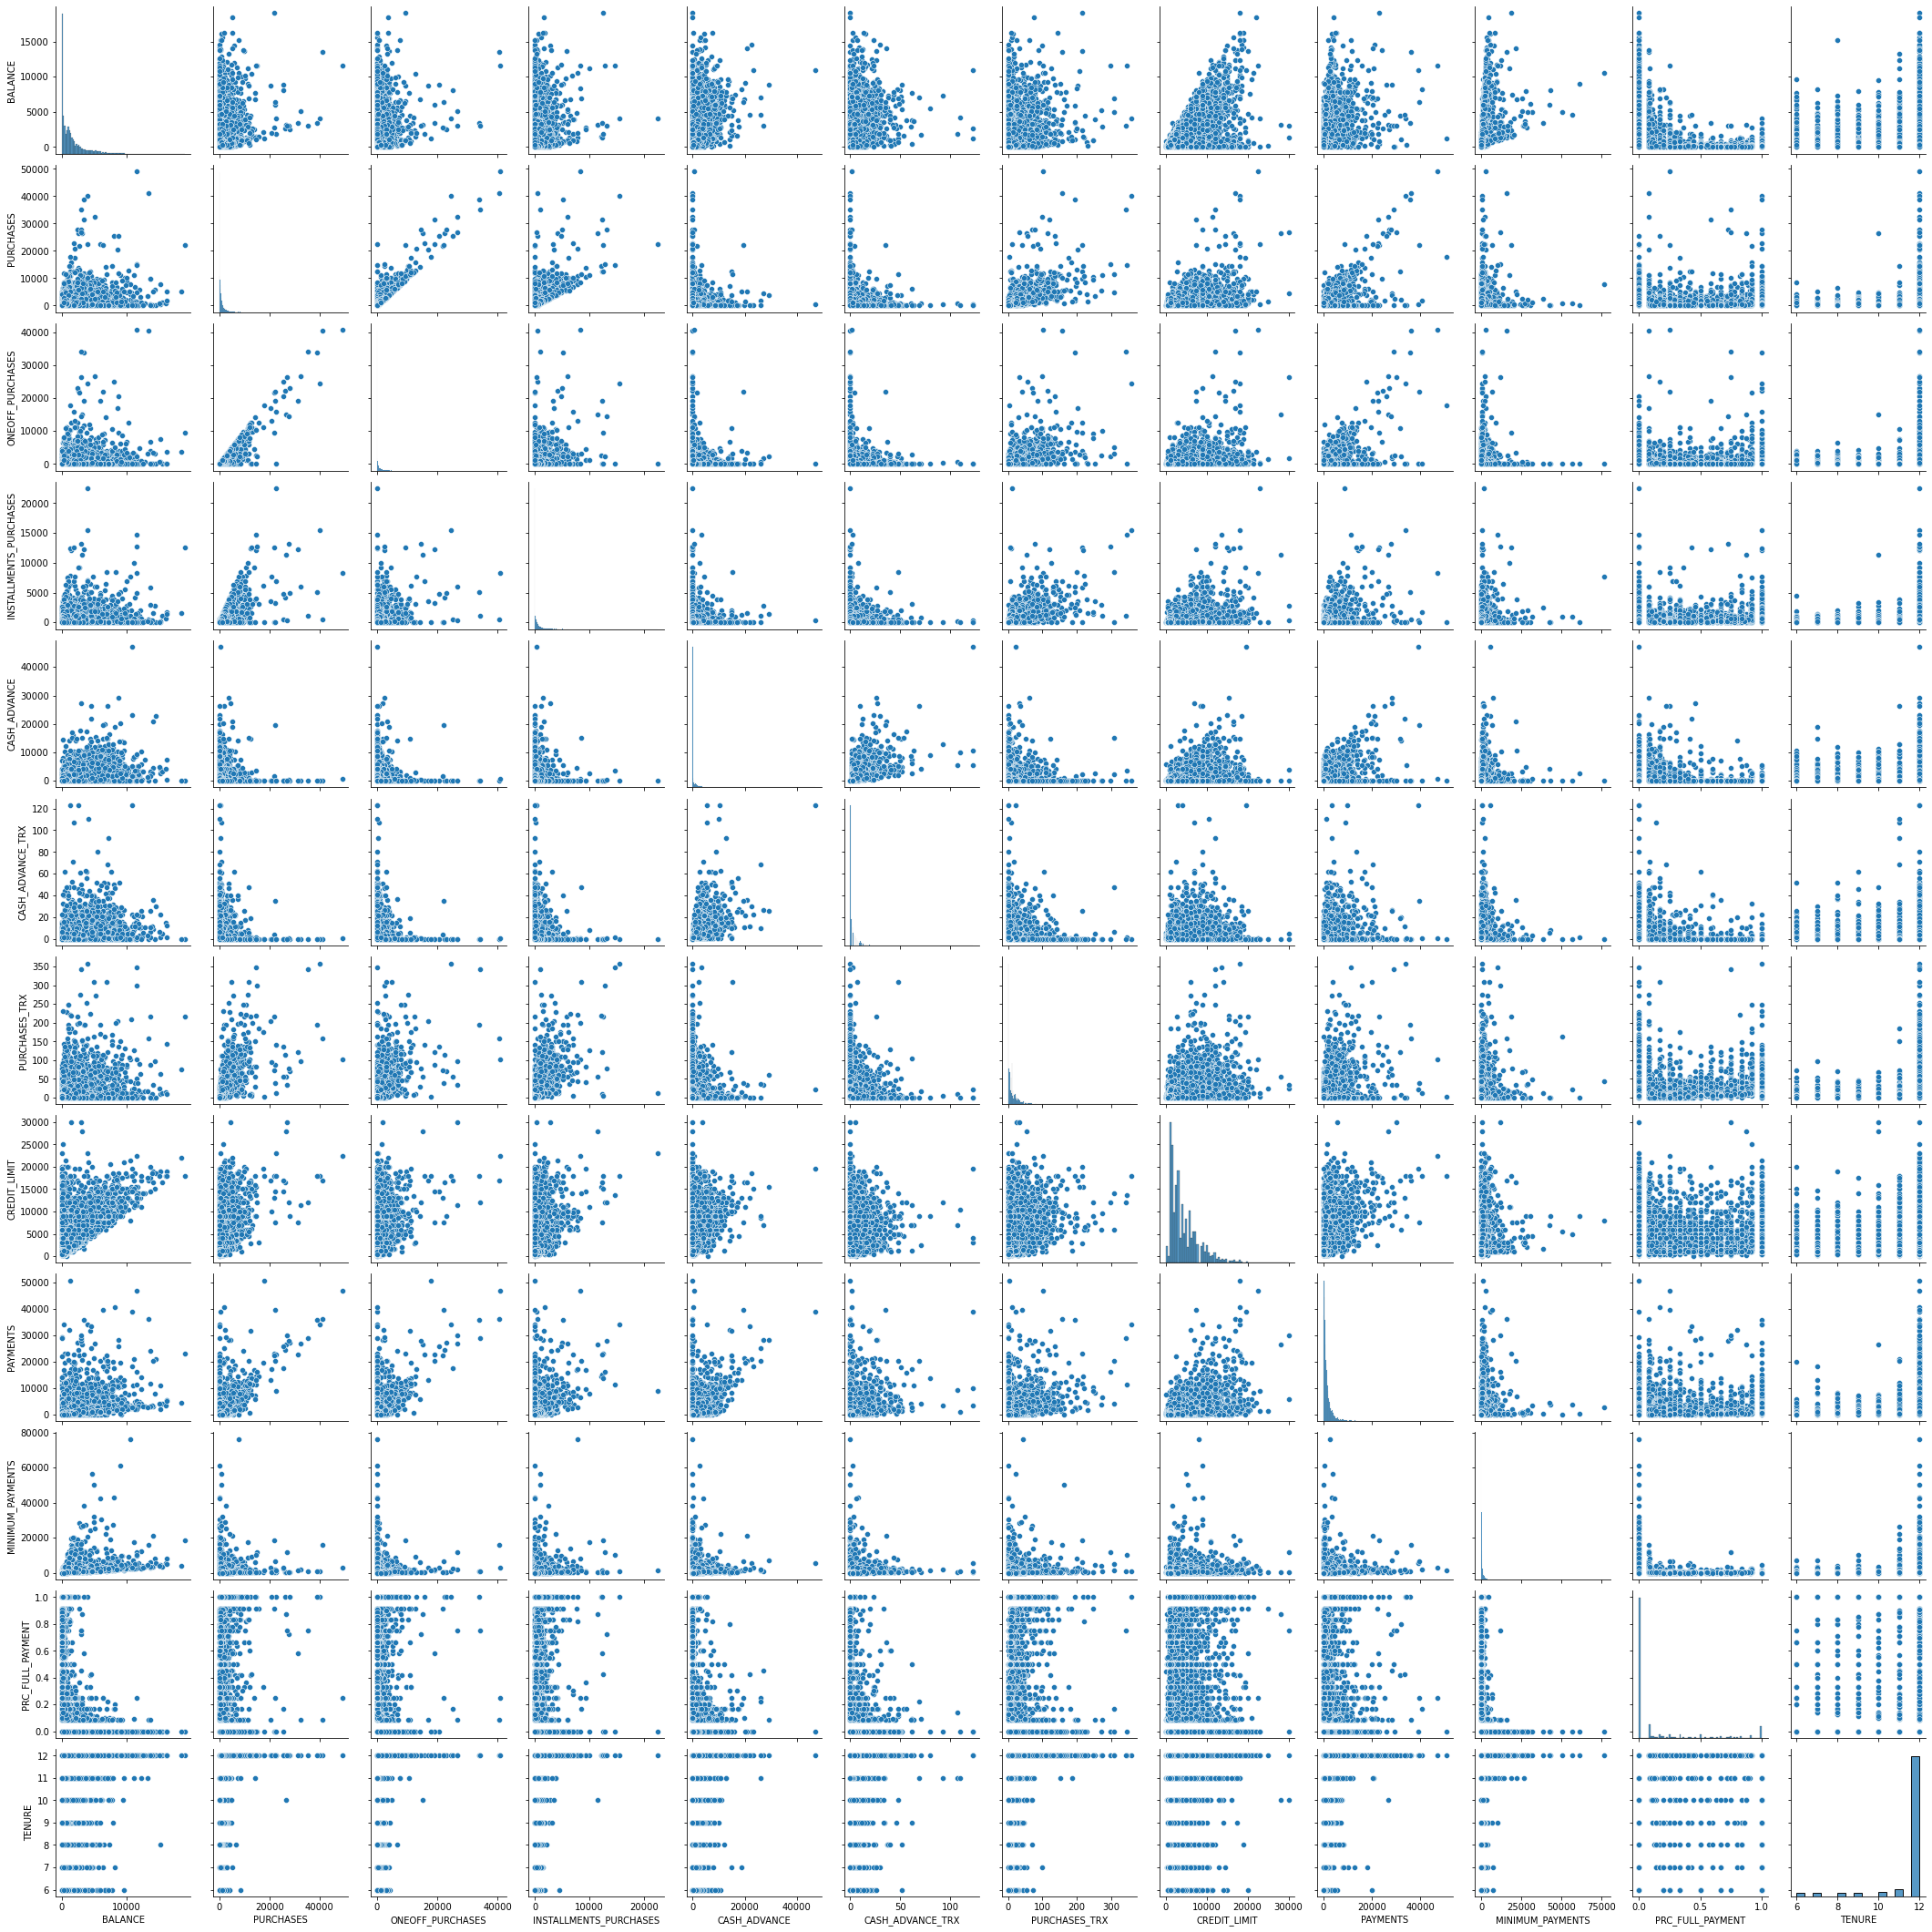

In [4]:
cols = [
    "BALANCE",
    "PURCHASES",
    "ONEOFF_PURCHASES",
    "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE",
    "CASH_ADVANCE_TRX",
    "PURCHASES_TRX",
    "CREDIT_LIMIT",
    "PAYMENTS",
    "MINIMUM_PAYMENTS",
    "PRC_FULL_PAYMENT",
    "TENURE"
]

sns.pairplot(data=data[cols])

In [5]:
data = data.dropna()

X = data[cols]
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [6]:
print(gm.weights_)
print(gm.means_)

[0.23518054 0.05905627 0.70576319]
[[2.28325946e+03 3.81095046e+02 2.33801933e+02 1.47293113e+02
  2.51983432e+03 7.69403099e+00 5.62241904e+00 4.80863158e+03
  2.13240105e+03 7.55589464e+02 1.21901380e-01 1.00927855e+01]
 [3.78859003e+03 4.80858517e+03 2.99109938e+03 1.82275360e+03
  2.03294796e+03 6.97509812e+00 5.39808476e+01 7.40622368e+03
  6.64472547e+03 5.50045610e+03 1.52400171e-01 1.17109648e+01]
 [1.19091888e+03 9.23582637e+02 5.28892133e+02 3.94690504e+02
  3.98860719e+02 1.54798222e+00 1.49101597e+01 4.18527143e+03
  1.26184842e+03 5.12592026e+02 1.72344787e-01 1.20000000e+01]]


In [7]:
print(gm.covariances_)

[[[ 6.62542816e+06 -3.90138860e+04  2.13558903e+04 -6.03697762e+04
    4.22172705e+06  8.70163311e+03 -7.21534356e+02  7.53122956e+06
    2.29168076e+06  1.85479848e+06 -2.25873050e+02  2.15069065e+03]
  [-3.90138860e+04  3.36630633e+05  2.42124422e+05  9.45062109e+04
   -1.70814685e+05 -4.20170933e+02  3.60872635e+03  1.52101971e+05
    4.86165418e+04  7.93619305e+02  1.27484948e+01 -6.45317480e+01]
  [ 2.13558903e+04  2.42124422e+05  2.23491122e+05  1.86333003e+04
   -8.06501564e+04 -1.80328462e+02  2.19932773e+03  1.76208374e+05
    6.29052328e+04  1.00111311e+04 -5.72875277e+00 -1.84074334e+01]
  [-6.03697762e+04  9.45062109e+04  1.86333003e+04  7.58729106e+04
   -9.01645284e+04 -2.39842470e+02  1.40939862e+03 -2.41064031e+04
   -1.42886910e+04 -9.21751181e+03  1.84772476e+01 -4.61243146e+01]
  [ 4.22172705e+06 -1.70814685e+05 -8.06501564e+04 -9.01645284e+04
    8.58467424e+06  1.39305320e+04 -2.66649323e+03  6.19105187e+06
    5.06439973e+06  1.21555581e+06 -1.63904378e+02  2.1285

In [8]:
print(gm.converged_)
print(gm.n_iter_)

True
54


In [9]:
gm.predict_proba(X)

array([[7.68067271e-06, 1.39495083e-15, 9.99992319e-01],
       [1.00000000e+00, 8.52638407e-11, 3.11030753e-24],
       [1.01208106e-05, 4.97268943e-15, 9.99989879e-01],
       ...,
       [1.00000000e+00, 2.55954508e-18, 0.00000000e+00],
       [1.00000000e+00, 2.84681670e-18, 0.00000000e+00],
       [1.00000000e+00, 2.66418983e-16, 0.00000000e+00]])